# **Image Processing 1: Let's play with the images**

---

<font color='red' face='Times New Roman'>**NOTE**: *Please take care of the `WARNING` and `NOTE` symbols in the following, and what you should do is marked by `TODO`*</font>

# **1. Load an image**

There are several ways to load images (e.g., *PIL, OpenCV, skimage*). We show examples of *PIL*, *OpenCV* and *skimage.io* here. Besides, to load an image with the url, we need the help of *urllib.request*.

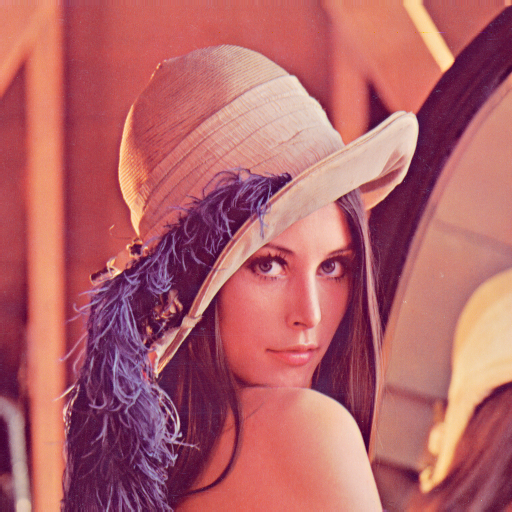

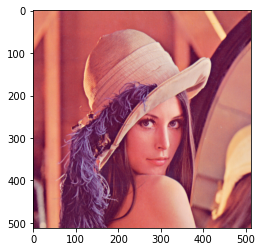

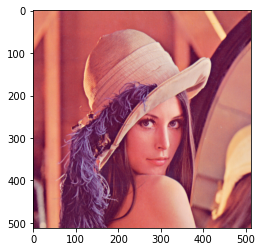

In [ ]:
import cv2              # OpenCV
import skimage.io       # skimage
from PIL import Image   # PIL
import urllib.request
from matplotlib import pyplot as plt

# save the image from the url
urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png', 
                           'lenna.png')

# load the image using PIL.Image
img_lenna = Image.open('lenna.png')
display(img_lenna)

# load the image using skimage.io
img_lenna2 = skimage.io.imread(fname='lenna.png')
# skimage.io.imshow(img_lenna2)
plt.imshow(img_lenna2)
plt.show()

# load the image using opencv
img_lenna3 = cv2.cvtColor(cv2.imread('lenna.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img_lenna3)
plt.show()


# **2. See what it is**

In [ ]:
# check out the image
print('Format:\t' + img_lenna.format)
print('Size:\t' + "%s"%(img_lenna.size,))   # NOTE: Image.size is [width, height]
print('Mode:\t' + img_lenna.mode)

# check out the image as arrays, note that img_lenna2 and img_lenna3 are already numpy arrays
import numpy as np
im = np.array(img_lenna)

print('Array Type:\t' + str(type(im)))
print('Data Type:\t' + str(im.dtype))
print('Array Shape:\t' + "%s"%(im.shape,))  # NOTE: array.shape is [height, width]

Format:	PNG
Size:	(512, 512)
Mode:	RGB
Array Type:	<class 'numpy.ndarray'>
Data Type:	uint8
Array Shape:	(512, 512, 3)


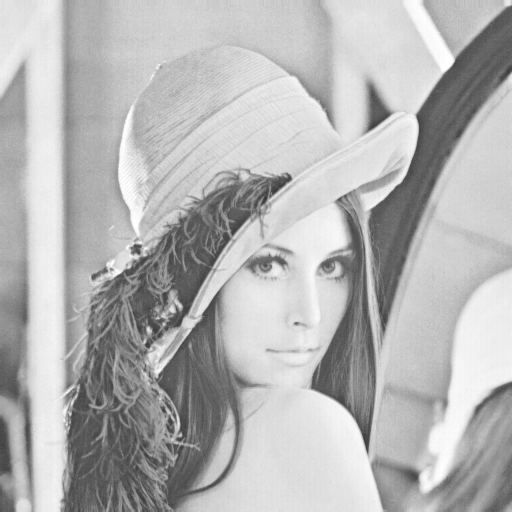

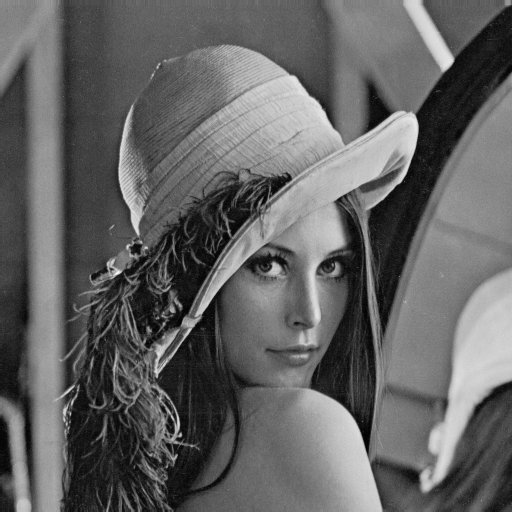

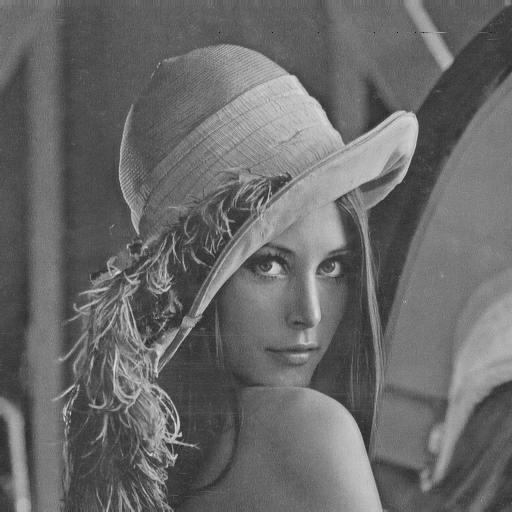

In [ ]:
# check out channels
R_img = Image.fromarray(im[:,:,0])
display(R_img)
G_img = Image.fromarray(im[:,:,1])
display(G_img)
B_img = Image.fromarray(im[:,:,2])
display(B_img)

# **3. Play with the image**

We can see from above that the R channel is dominating, which results in a warm color image. Can we make it a cool color?

It can be done by simply "inverse" the value of each pixel within the range of [0, 255]. For example, for a value x (e.g., 30), it's inverted value is (255-x) (e.g., 255-30 = 225).

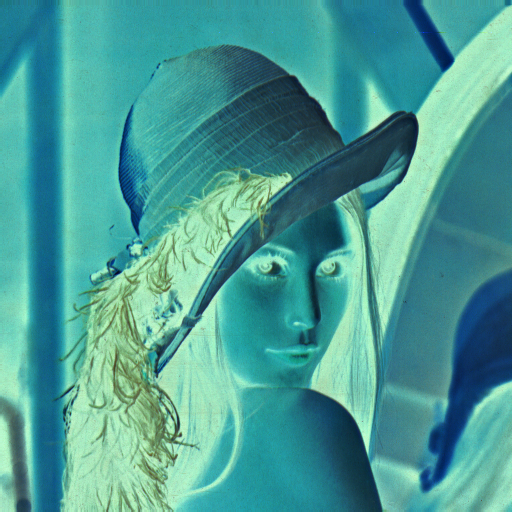

In [ ]:
cool_img = Image.fromarray(255-im)
display(cool_img)

Now, it looks ''cool''. But it's too large to fit into my small screen. Can you make it smaller?

Sure. We can resize an image (let's call it the source image hereafter) by generating a target image with pixels selected from the source. For example, to reduce the size by 50%, we can select one from two neighbour pixels into the target image.

uint8
<class 'numpy.ndarray'>
(256, 256)


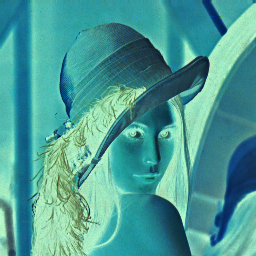

In [ ]:
from numpy.core.fromnumeric import shape
cool_array = 255-im
height_new, width_new = int(im.shape[0]/2), int(im.shape[1]/2)

cool_array_small = np.ndarray((height_new, width_new,3), dtype=np.uint8)
for i in range(height_new):
  for j in range(width_new):
    # TODO: complete the following statement.
    # Recall that the array is organized as [H, W, C]
    cool_array_small[i,j,:] = cool_array[i*2,j*2,:]

cool_img_small = Image.fromarray(cool_array_small)
print(cool_array_small.dtype)
print(type(cool_array_small))
print(cool_img_small.size)
display(cool_img_small)

Similarly, we can enlarge the image by duplicating the pixels to its neighbours in the target. Let's double the size of the source.

uint8
<class 'numpy.ndarray'>
(1024, 1024)


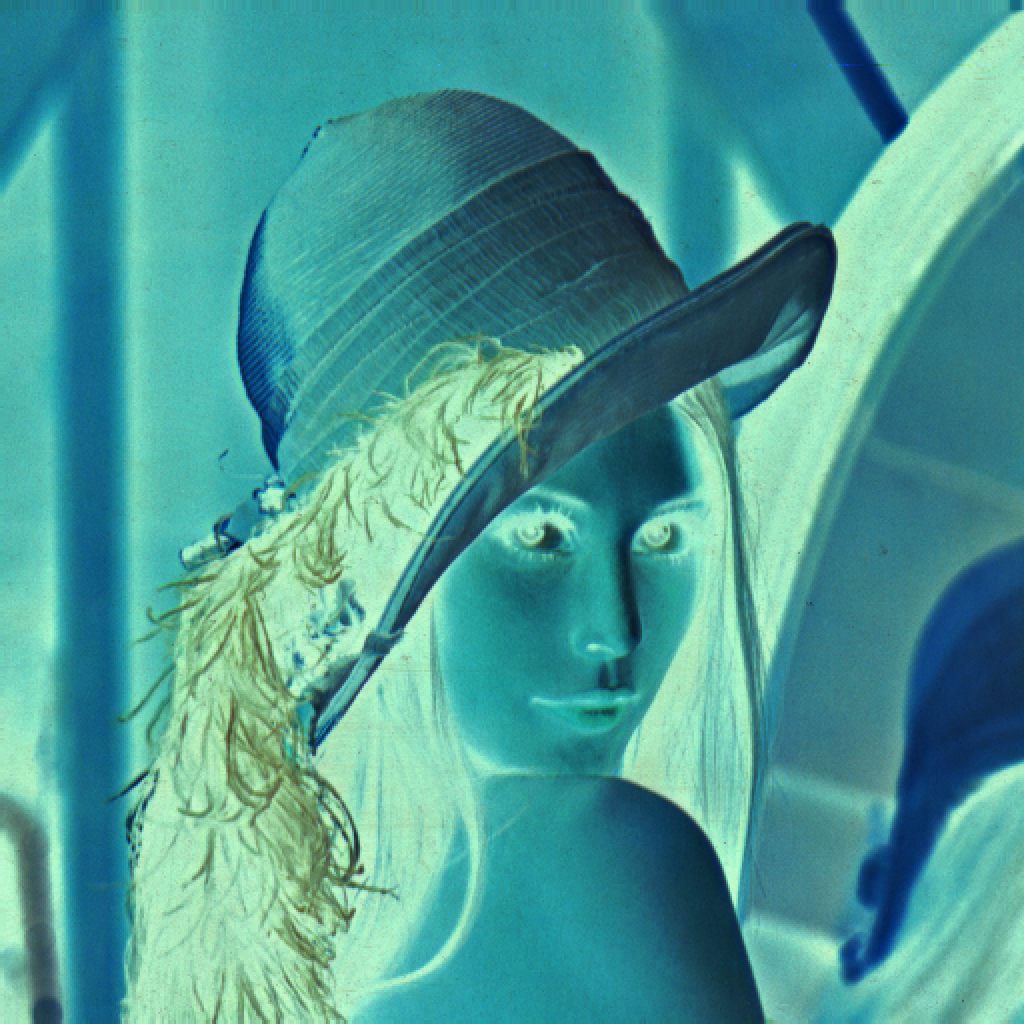

In [ ]:
height_lg, width_lg = int(im.shape[0]*2), int(im.shape[1]*2)

cool_array_large = np.ndarray((height_lg, width_lg, 3), dtype=np.uint8)
for i in range(height_lg):
  for j in range(width_lg):
    # TODO: complete the following statement.
    # Recall that the array is organized as [H, W, C]
    cool_array_large[i,j,:] = cool_array[i//2, j//2, :]

cool_img_large = Image.fromarray(cool_array_large)
print(cool_array_large.dtype)
print(type(cool_array_large))
print(cool_img_large.size)
display(cool_img_large)

It's cool! Can we enlarge an image into any size?

Let's try enlarge it by 10 times using the same code and see what happens.

uint8
<class 'numpy.ndarray'>
(5120, 5120)


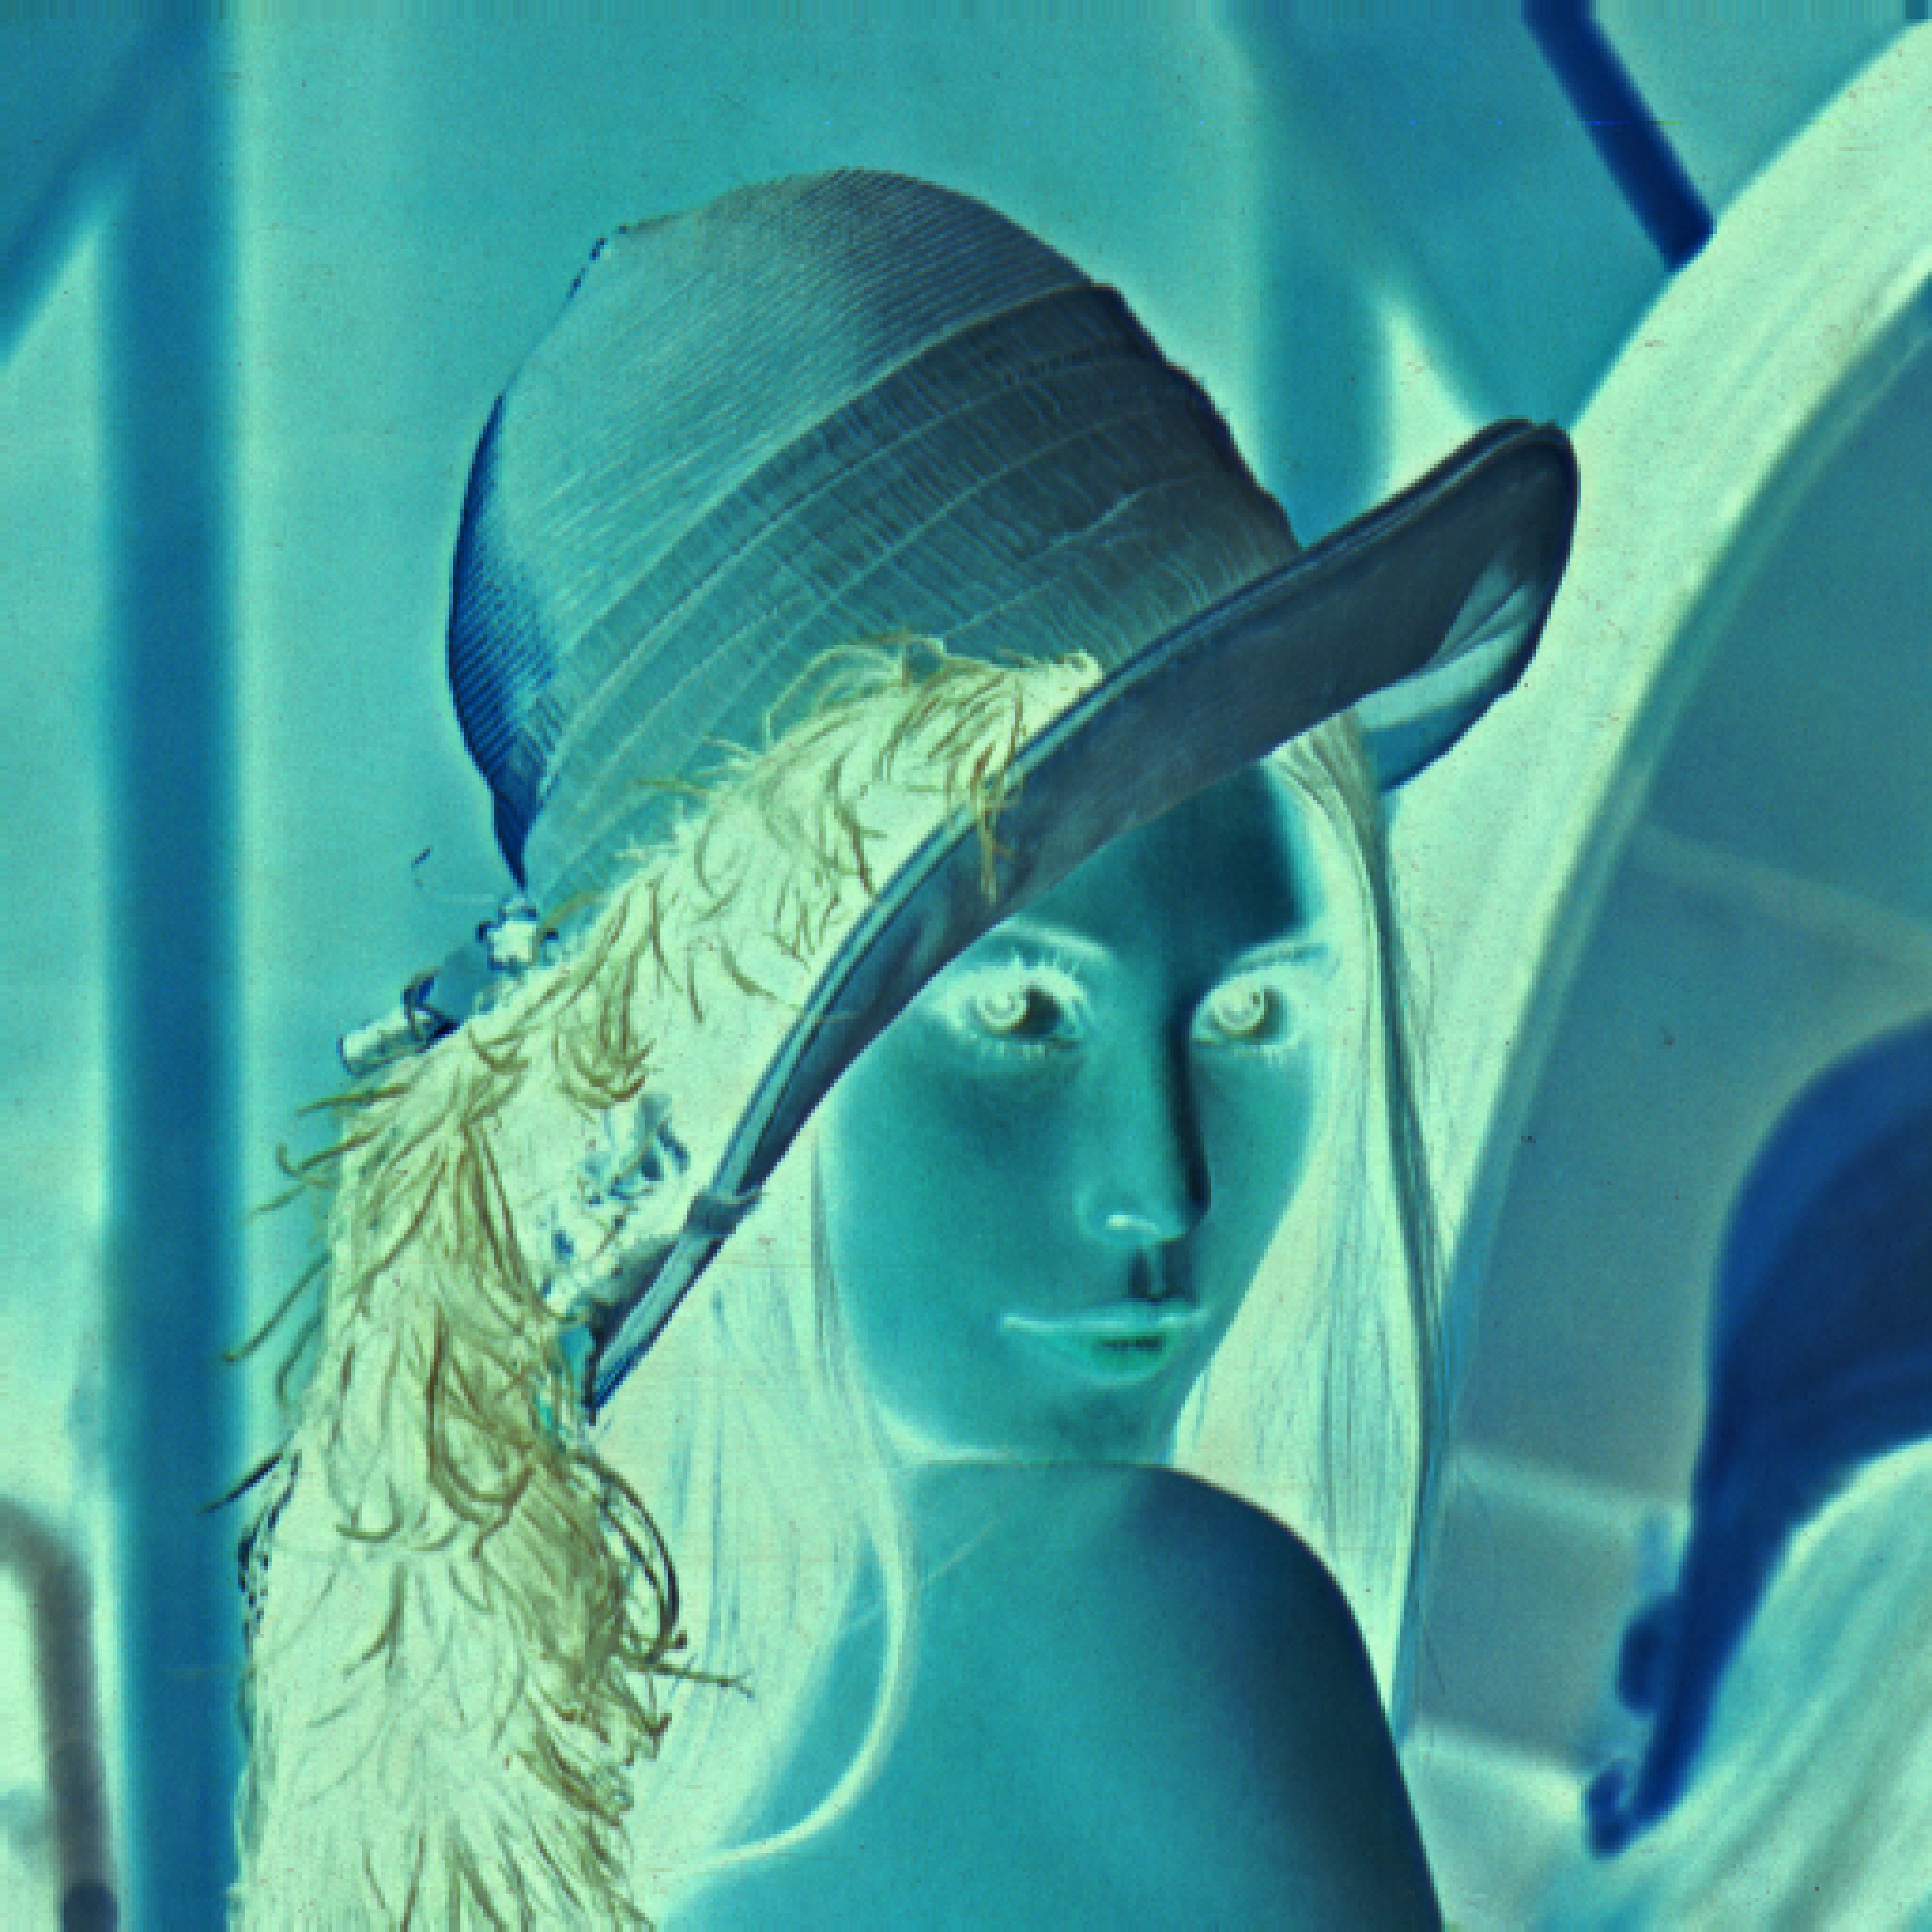

In [ ]:
height_lg10, width_lg10 = int(im.shape[0]*10), int(im.shape[1]*10)

cool_array_large10 = np.ndarray((height_lg10, width_lg10, 3), dtype=np.uint8)
for i in range(height_lg10):
  for j in range(width_lg10):
    # TODO: complete the following statement.
    # Recall that the array is organized as [H, W, C]
    cool_array_large10[i,j,:] = cool_array[i//10, j//10, :]

cool_img_large10 = Image.fromarray(cool_array_large10)
print(cool_array_large10.dtype)
print(type(cool_array_large10))
print(cool_img_large10.size)
display(cool_img_large10)

<font color='gray' face='Times New Roman'>**NOTE**: *If the image displayed is not as large as expected, you can click right button on the image, and choose ''open image in new tab'' for better observation*</font>

Unfortunately, it doesn't look good. Please try implement bilinear and bicubic interpolation here.

Great! Let's take a step further. Say, we want to watch the image when we're lying on the bed, and it would be better to rotate the image clockwisely by 90 degree so that we don't have to rotate our screeen.

(512, 512)


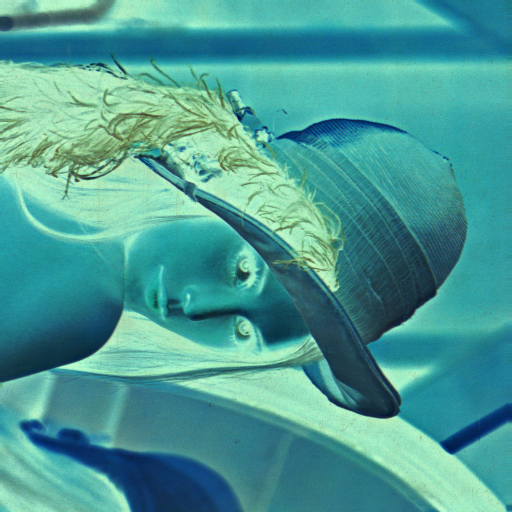

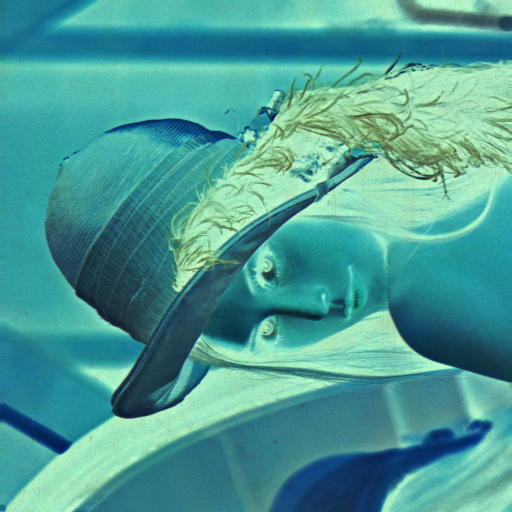

In [ ]:
# cool_array = np.array(cool_img_lg)
height_cw90, width_cw90 = cool_array.shape[1],cool_array.shape[0]

cool_array_cw90 = np.ndarray((height_cw90, width_cw90, 3), dtype=np.uint8)
for i in range(height_cw90):
  for j in range(width_cw90):
    # TODO: complete the following statement.
    # Recall that the array is organized as [H, W, C]
    cool_array_cw90[i,j,:] = cool_array[width_cw90-1-j, i, :]

cool_img_cw90=Image.fromarray(cool_array_cw90)
print(cool_img_cw90.size)
display(cool_img_cw90)

display(Image.fromarray(cool_array_cw90[:, ::-1]))

Congratulations! You just grasped the basics of Image Processing.

But ...


In fact, there are much easier ways ... by using libraries (e.g., OpenCV).

(512, 512)


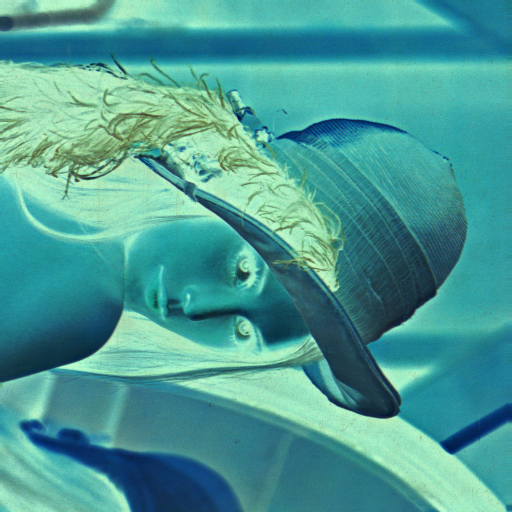

In [ ]:
import cv2 #import OpenCV

img_rotate_90_clockwise = cv2.rotate(cool_array, cv2.ROTATE_90_CLOCKWISE)
cool_img_cw90 = Image.fromarray(img_rotate_90_clockwise)
print(cool_img_cw90.size)
display(cool_img_cw90)

(512, 512)


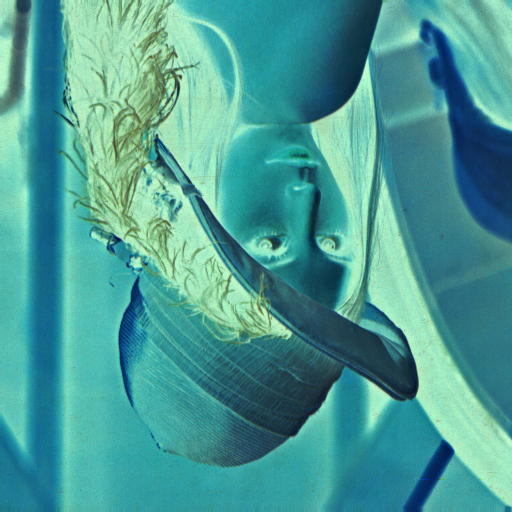

In [ ]:
img_flip_ud = cv2.flip(cool_array, 0)
cool_img_new = Image.fromarray(img_flip_ud)
print(cool_img_new.size)
display(cool_img_new)

(512, 512)


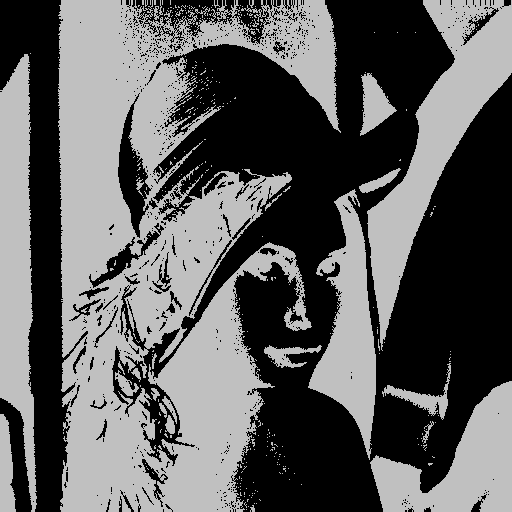

In [ ]:
# convert the image into gray
im_gray = cv2.cvtColor(cool_array, cv2.COLOR_BGR2GRAY)
# binarize the image using a threshold
th, im_gray_th_otsu = cv2.threshold(im_gray, 128, 192, cv2.THRESH_OTSU)
cool_img_new = Image.fromarray(im_gray_th_otsu)
print(cool_img_new.size)
display(cool_img_new)

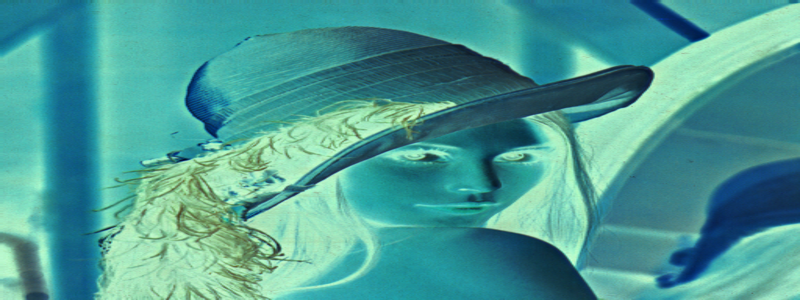

In [ ]:
cool_img_lg = cool_img.resize((800,300),Image.BICUBIC)
# NOTE: In most image libraries (e.g., PIL and OpenCV), the size of an image is [width, height], which is
# coincide with the coordinates, i.e., the X-Y axes.
# However, in most arrays (e.g., numpy), the shape of an array is [height, width], which is coincide with
# the storage format (row-major for C and Python)
display(cool_img_lg)